# Use Claims_Modeling Notebook template

## Import Snowpark Pandas for dumping csv to Snowflake table

In [13]:
!pip install --q "snowflake-connector-python[pandas]"
!sudo pip install --q  snowflake-ml-python==1.0.11 -U
!pip install --upgrade --q snowflake-snowpark-python==1.9.0
!pip install --q seaborn
!pip install --q plotly 
!pip install --upgrade --q xgboost==1.7.3
!pip install --upgrade --q numpy==1.24.3
!pip install --upgrade --q pandas==1.5.3
!pip install --upgrade --q anyio==3.5.0
!pip install --upgrade --q packaging==23.1
!pip install --upgrade --q scikit-learn==1.3.0
!pip install --upgrade --q typing-extensions==4.7.1
!pip install --upgrade --q cryptography==39.0.0
!pip install --upgrade --q fsspec==2023.9.2

ERROR: refractio 2.1.5.5 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: mlflow 2.6.0 has requirement packaging<24, but you'll have packaging 24.0 which is incompatible.
ERROR: mlflow 2.6.0 has requirement pyarrow<13,>=4.0.0, but you'll have pyarrow 16.0.0 which is incompatible.
ERROR: mlflow 2.6.0 has requirement pytz<2024, but you'll have pytz 2024.1 which is incompatible.
ERROR: snowflake-snowpark-python 1.9.0 has requirement cloudpickle<=2.0.0,>=1.6.0; python_version < "3.11", but you'll have cloudpickle 2.2.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement cloudpickle==1.6.0, but you'll have cloudpickle 2.2.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement PyYAML==6.0, but you'll have pyyaml 6.0.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement urllib3==1.26.15, but you'll have urllib3 1.26.18 which is incompatible.
ERROR: mosaic-utils 1.0.2 has requirement scikit-learn==1.2.1; python_version >= "3

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
ERROR: mlflow 2.6.0 has requirement packaging<24, but you'll have packaging 24.0 which is incompatible.
ERROR: mlflow 2.6.0 has requirement pytz<2024, but you'll have pytz 2024.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement cloudpickle==1.6.0, but you'll have cloudpickle 2.0.0 which is incompatible.
ERROR: refractml 1.0.4 has requirement PyYAML==6.0, but you'll have pyyaml 6.0.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement urllib3==1.26.15, but you'll have urllib3 1.26.18 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement packaging<24,>=20.9, but you'll have packaging 24.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement xgboost<2,>=1.7.3, bu

ERROR: mlflow 2.6.0 has requirement packaging<24, but you'll have packaging 24.0 which is incompatible.
ERROR: mlflow 2.6.0 has requirement pytz<2024, but you'll have pytz 2024.1 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement packaging<24,>=20.9, but you'll have packaging 24.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement xgboost<2,>=1.7.3, but you'll have xgboost 2.0.3 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; python_version >= "3.7", but you'll have flask 2.3.3 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement itsdangerous==2.0.1, but you'll have itsdangerous 2.1.2 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Jinja2==3.0.3, but you'll have jinja2 3.1.3 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement matplot

ERROR: mlflow 2.6.0 has requirement pytz<2024, but you'll have pytz 2024.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement cloudpickle==1.6.0, but you'll have cloudpickle 2.2.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement PyYAML==6.0, but you'll have pyyaml 6.0.1 which is incompatible.
ERROR: refractml 1.0.4 has requirement urllib3==1.26.15, but you'll have urllib3 1.26.18 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.11 has requirement xgboost<2,>=1.7.3, but you'll have xgboost 2.0.3 which is incompatible.
ERROR: mosaic-ai-client 1.0.0 has requirement matplotlib==3.1.1, but you'll have matplotlib 3.7.5 which is incompatible.
ERROR: jupyterlab-server 2.25.4 has requirement jsonschema>=4.18.0, but you'll have jsonschema 3.2.0 which is incompatible.
You should consider upgrading via the 'pip install --upgrade pip' command.
ERROR: m

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from snowflake.snowpark import Session
from snowflake.ml.modeling.pipeline import Pipeline
from snowflake.ml.modeling.xgboost import XGBRegressor
from snowflake.ml.modeling.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
# import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
# Pandas Tools
from snowflake.connector.pandas_tools import write_pandas
# Data Science Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')
import configparser

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 

Matplotlib created a temporary cache directory at /tmp/matplotlib-xeg0jcby because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


## Code to establish connection and read and dump csv as a snowflake table (handling null values before loading)

In [2]:
config = configparser.ConfigParser()
config.read("snowflake_connection.ini")

['snowflake_connection.ini']

In [3]:
connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    #"password": os.getenv('snowflake_password'),
    "account": f'{config["Snowflake"]["account"]}',
    #"account": os.getenv('snowflake_account'),
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}

In [4]:
def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session

session = snowflake_connector(connection_parameters)

connection successful!


In [5]:
df = session.table("AUTO_INSURANCE_CLAIMS_DATA_PRODUCT")

In [6]:
insurance_claim = df.to_pandas()

# Shape of Insurance claims data

In [7]:
insurance_claim.shape

(234265, 40)

# Generic Information of Insurance claims data

In [8]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234265 entries, 0 to 234264
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MONTHS_AS_CUSTOMER           234265 non-null  int16  
 1   CUSTOMER_AGE                 234265 non-null  object 
 2   POLICY_NUMBER                234265 non-null  int32  
 3   POLICY_BIND_DATE             234265 non-null  object 
 4   POLICY_STATE                 234265 non-null  object 
 5   POLICY_CSL                   234265 non-null  object 
 6   POLICY_DEDUCTABLE            234265 non-null  int16  
 7   POLICY_ANNUAL_PREMIUM        234265 non-null  int16  
 8   UMBRELLA_LIMIT               234265 non-null  int32  
 9   INSURED_ZIP                  234265 non-null  object 
 10  INSURED_SEX                  234265 non-null  object 
 11  INSURED_EDUCATION_LEVEL      234265 non-null  object 
 12  INSURED_OCCUPATION           234265 non-null  object 
 13 

# Description of Insurance claims data

In [9]:
insurance_claim.describe()

,MONTHS_AS_CUSTOMER,POLICY_NUMBER,POLICY_DEDUCTABLE,POLICY_ANNUAL_PREMIUM,UMBRELLA_LIMIT,CAPITAL_GAINS,CAPITAL_LOSS,INCIDENT_HOUR_OF_THE_DAY,NUMBER_OF_VEHICLES_INVOLVED,BODILY_INJURIES,WITNESSES,TOTAL_CLAIM_AMOUNT_PAID,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM,AUTO_YEAR
count,234265.000000,234265.000000,234265.000000,234265.000000,2.342650e+05,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000,234265.000000
mean,126.935091,455855.966764,1253.716919,1566.581397,5.196103e+06,47683.270121,-41024.589448,15.049657,1.476256,0.996500,1.500758,67245.407389,7735.250861,8539.701462,50970.455066,2004.857341
std,91.045672,17736.367557,534.953165,656.303803,2.963737e+06,27788.588777,23817.898425,5.858884,0.701641,0.817618,1.115194,18860.146419,7150.204814,7872.342302,15684.477045,6.058393
min,6.000000,425150.000000,301.000000,430.000000,0.000000e+00,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,21214.000000,300.000000,0.000000,20004.000000,1995.000000
25%,43.000000,440492.000000,794.000000,996.000000,3.074314e+06,23592.000000,-61528.000000,11.000000,1.000000,0.000000,1.000000,53424.000000,523.000000,1025.000000,37618.000000,2000.000000
50%,112.000000,455846.000000,1250.000000,1569.000000,5.367228e+06,47857.000000,-41248.000000,16.000000,1.000000,1.000000,2.000000,67752.000000,6064.000000,6218.000000,50923.000000,2005.000000
75%,197.000000,471213.000000,1698.000000,2134.000000,7.682851e+06,71510.000000,-20363.000000,20.000000,2.000000,2.000000,2.000000,81090.000000,14012.000000,15323.000000,64362.000000,2010.000000
max,328.000000,486590.000000,2430.000000,2700.000000,9.999929e+06,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,121412.000000,21899.000000,26490.000000,81998.000000,2015.000000


In [10]:
insurance_claim.describe(include='O')

,CUSTOMER_AGE,POLICY_BIND_DATE,POLICY_STATE,POLICY_CSL,INSURED_ZIP,INSURED_SEX,INSURED_EDUCATION_LEVEL,INSURED_OCCUPATION,INSURED_HOBBIES,INSURED_RELATIONSHIP,...,AUTHORITIES_CONTACTED,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_LOCATION,INCIDENT_TIME_OF_DAY,PROPERTY_DAMAGE,POLICE_REPORT_AVAILABLE,AUTO_MAKE,AUTO_MODEL,FRAUD_REPORTED
count,234265,234265,234265,234265,234265,234265,234265,234265,234265,234265,...,234265,234265,234265,234265,234265,234265,234265,234265,234265,234265
unique,51,10044,1,3,995,2,7,14,20,6,...,5,1,10,1032,4,3,3,14,39,2
top,33,11-06-2013,CT,100/300,431532,MALE,JD,prof-specialty,kayaking,unmarried,...,Police,CT,Hartford,St,Night Time,Property Damage,Police Report Available,Nissan,RAM,No Fraud Reported
freq,4910,67,234265,78564,337,117455,38426,27637,12104,39357,...,47433,234265,55768,13547,104477,132025,101965,20119,7953,199657


# Check Null Values

In [11]:
insurance_claim.isnull().sum()

MONTHS_AS_CUSTOMER             0
CUSTOMER_AGE                   0
POLICY_NUMBER                  0
POLICY_BIND_DATE               0
POLICY_STATE                   0
POLICY_CSL                     0
POLICY_DEDUCTABLE              0
POLICY_ANNUAL_PREMIUM          0
UMBRELLA_LIMIT                 0
INSURED_ZIP                    0
INSURED_SEX                    0
INSURED_EDUCATION_LEVEL        0
INSURED_OCCUPATION             0
INSURED_HOBBIES                0
INSURED_RELATIONSHIP           0
CAPITAL_GAINS                  0
CAPITAL_LOSS                   0
INCIDENT_DATE                  0
INCIDENT_TYPE                  0
COLLISION_TYPE                 0
INCIDENT_SEVERITY              0
AUTHORITIES_CONTACTED          0
INCIDENT_STATE                 0
INCIDENT_CITY                  0
INCIDENT_LOCATION              0
INCIDENT_HOUR_OF_THE_DAY       0
INCIDENT_TIME_OF_DAY           0
NUMBER_OF_VEHICLES_INVOLVED    0
PROPERTY_DAMAGE                0
BODILY_INJURIES                0
WITNESSES 

### Visualization 

In [12]:
insurance_claim=insurance_claim.replace("?",np.NaN)
round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

MONTHS_AS_CUSTOMER             0.0
CUSTOMER_AGE                   0.0
POLICY_NUMBER                  0.0
POLICY_BIND_DATE               0.0
POLICY_STATE                   0.0
POLICY_CSL                     0.0
POLICY_DEDUCTABLE              0.0
POLICY_ANNUAL_PREMIUM          0.0
UMBRELLA_LIMIT                 0.0
INSURED_ZIP                    0.0
INSURED_SEX                    0.0
INSURED_EDUCATION_LEVEL        0.0
INSURED_OCCUPATION             0.0
INSURED_HOBBIES                0.0
INSURED_RELATIONSHIP           0.0
CAPITAL_GAINS                  0.0
CAPITAL_LOSS                   0.0
INCIDENT_DATE                  0.0
INCIDENT_TYPE                  0.0
COLLISION_TYPE                 0.0
INCIDENT_SEVERITY              0.0
AUTHORITIES_CONTACTED          0.0
INCIDENT_STATE                 0.0
INCIDENT_CITY                  0.0
INCIDENT_LOCATION              0.0
INCIDENT_HOUR_OF_THE_DAY       0.0
INCIDENT_TIME_OF_DAY           0.0
NUMBER_OF_VEHICLES_INVOLVED    0.0
PROPERTY_DAMAGE     

In [14]:
### Checking unique values for collosion type
round(100*(insurance_claim['COLLISION_TYPE'].value_counts(normalize=True,dropna=False)),2)

COLLISION_TYPE
Rear Collision           36.71
Front Collision          24.47
Side Collision           24.41
Details not Available    14.41
Name: proportion, dtype: float64

In [15]:
### We can impute collosion type with mode i.e most occuring collosion type
### imputing

insurance_claim['COLLISION_TYPE']=insurance_claim['COLLISION_TYPE'].fillna(insurance_claim['COLLISION_TYPE'].mode()[0])

In [16]:
### Checking unique values for collosion type

round(100*(insurance_claim['PROPERTY_DAMAGE'].value_counts(normalize=True,dropna=False)),2)

PROPERTY_DAMAGE
Property Damage          56.36
No Property Damage       37.84
Details not Available     5.80
Name: proportion, dtype: float64

In [17]:
### If there was property loss,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['PROPERTY_DAMAGE']=insurance_claim['PROPERTY_DAMAGE'].fillna("NO")

In [18]:
### Checking unique values for collosion type

round(100*(insurance_claim['POLICE_REPORT_AVAILABLE'].value_counts(normalize=True,dropna=False)),2)

POLICE_REPORT_AVAILABLE
Police Report Available       43.53
No Police Report Available    40.27
Unknown                       16.20
Name: proportion, dtype: float64

In [19]:
### If there was police reported,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['POLICE_REPORT_AVAILABLE']=insurance_claim['PROPERTY_DAMAGE'].fillna("NO")

In [20]:
### Checking missing value again

round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

MONTHS_AS_CUSTOMER             0.0
CUSTOMER_AGE                   0.0
POLICY_NUMBER                  0.0
POLICY_BIND_DATE               0.0
POLICY_STATE                   0.0
POLICY_CSL                     0.0
POLICY_DEDUCTABLE              0.0
POLICY_ANNUAL_PREMIUM          0.0
UMBRELLA_LIMIT                 0.0
INSURED_ZIP                    0.0
INSURED_SEX                    0.0
INSURED_EDUCATION_LEVEL        0.0
INSURED_OCCUPATION             0.0
INSURED_HOBBIES                0.0
INSURED_RELATIONSHIP           0.0
CAPITAL_GAINS                  0.0
CAPITAL_LOSS                   0.0
INCIDENT_DATE                  0.0
INCIDENT_TYPE                  0.0
COLLISION_TYPE                 0.0
INCIDENT_SEVERITY              0.0
AUTHORITIES_CONTACTED          0.0
INCIDENT_STATE                 0.0
INCIDENT_CITY                  0.0
INCIDENT_LOCATION              0.0
INCIDENT_HOUR_OF_THE_DAY       0.0
INCIDENT_TIME_OF_DAY           0.0
NUMBER_OF_VEHICLES_INVOLVED    0.0
PROPERTY_DAMAGE     

In [22]:
### Dropping those column which are not much sighnificance in oir analysis

insurance_claim.drop(["INCIDENT_HOUR_OF_THE_DAY",'INSURED_ZIP','POLICY_BIND_DATE','INCIDENT_LOCATION'],axis=1,inplace=True)

In [23]:
### Checking shape of dataset again

insurance_claim.shape

(234265, 36)

In [24]:
### Checking values for each column

insurance_claim.nunique()

MONTHS_AS_CUSTOMER               323
CUSTOMER_AGE                      51
POLICY_NUMBER                  61441
POLICY_STATE                       1
POLICY_CSL                         3
POLICY_DEDUCTABLE               2121
POLICY_ANNUAL_PREMIUM           2271
UMBRELLA_LIMIT                 53101
INSURED_SEX                        2
INSURED_EDUCATION_LEVEL            7
INSURED_OCCUPATION                14
INSURED_HOBBIES                   20
INSURED_RELATIONSHIP               6
CAPITAL_GAINS                  45174
CAPITAL_LOSS                   42927
INCIDENT_DATE                   1003
INCIDENT_TYPE                      4
COLLISION_TYPE                     4
INCIDENT_SEVERITY                  3
AUTHORITIES_CONTACTED              5
INCIDENT_STATE                     1
INCIDENT_CITY                     10
INCIDENT_TIME_OF_DAY               4
NUMBER_OF_VEHICLES_INVOLVED        4
PROPERTY_DAMAGE                    3
BODILY_INJURIES                    3
WITNESSES                          4
P

In [25]:
### SANITY CHECK - Total claim must be equal to sum of "injury_claim","property_claim","vehicle_claim"

insurance_claim[insurance_claim['TOTAL_CLAIM_AMOUNT_PAID'] != insurance_claim['INJURY_CLAIM']+insurance_claim['PROPERTY_CLAIM']+insurance_claim['VEHICLE_CLAIM']].shape[0]

0

In [32]:
### Others sanity check
print(insurance_claim[insurance_claim['MONTHS_AS_CUSTOMER']<0].shape[0])
#print(insurance_claim[insurance_claim['CUSTOMER_AGE']<0].shape[0])
print(insurance_claim[insurance_claim['POLICY_DEDUCTABLE']<0].shape[0])
print(insurance_claim[insurance_claim['TOTAL_CLAIM_AMOUNT_PAID']<0].shape[0])
print(insurance_claim[insurance_claim['UMBRELLA_LIMIT']<0].shape[0])
print(insurance_claim[insurance_claim['CAPITAL_GAINS']<0].shape[0])
print(insurance_claim[insurance_claim['NUMBER_OF_VEHICLES_INVOLVED']<0].shape[0])
print(insurance_claim[insurance_claim['INJURY_CLAIM']<0].shape[0])
print(insurance_claim[insurance_claim['PROPERTY_CLAIM']<0].shape[0])
print(insurance_claim[insurance_claim['VEHICLE_CLAIM']<0].shape[0])

0
0
0
0
0
0
0
0
0


In [33]:
### Checking datatypes
insurance_claim.dtypes

MONTHS_AS_CUSTOMER               int16
CUSTOMER_AGE                    object
POLICY_NUMBER                    int32
POLICY_STATE                    object
POLICY_CSL                      object
POLICY_DEDUCTABLE                int16
POLICY_ANNUAL_PREMIUM            int16
UMBRELLA_LIMIT                   int32
INSURED_SEX                     object
INSURED_EDUCATION_LEVEL         object
INSURED_OCCUPATION              object
INSURED_HOBBIES                 object
INSURED_RELATIONSHIP            object
CAPITAL_GAINS                    int32
CAPITAL_LOSS                     int32
INCIDENT_DATE                   object
INCIDENT_TYPE                   object
COLLISION_TYPE                  object
INCIDENT_SEVERITY               object
AUTHORITIES_CONTACTED           object
INCIDENT_STATE                  object
INCIDENT_CITY                   object
INCIDENT_TIME_OF_DAY            object
NUMBER_OF_VEHICLES_INVOLVED       int8
PROPERTY_DAMAGE                 object
BODILY_INJURIES          

In [34]:
### changing Incident date into datetime format
insurance_claim['INCIDENT_DATE']=pd.to_datetime(insurance_claim['INCIDENT_DATE'],format='%Y-%m-%d')

### changing auto_year date into datetime format
insurance_claim['AUTO_YEAR']=pd.to_datetime(insurance_claim['AUTO_YEAR'],format='%Y')

In [35]:
# OUTLIER DETECTION
insurance_claim.describe().columns.to_list()

['MONTHS_AS_CUSTOMER',
 'POLICY_NUMBER',
 'POLICY_DEDUCTABLE',
 'POLICY_ANNUAL_PREMIUM',
 'UMBRELLA_LIMIT',
 'CAPITAL_GAINS',
 'CAPITAL_LOSS',
 'INCIDENT_DATE',
 'NUMBER_OF_VEHICLES_INVOLVED',
 'BODILY_INJURIES',
 'WITNESSES',
 'TOTAL_CLAIM_AMOUNT_PAID',
 'INJURY_CLAIM',
 'PROPERTY_CLAIM',
 'VEHICLE_CLAIM',
 'AUTO_YEAR']

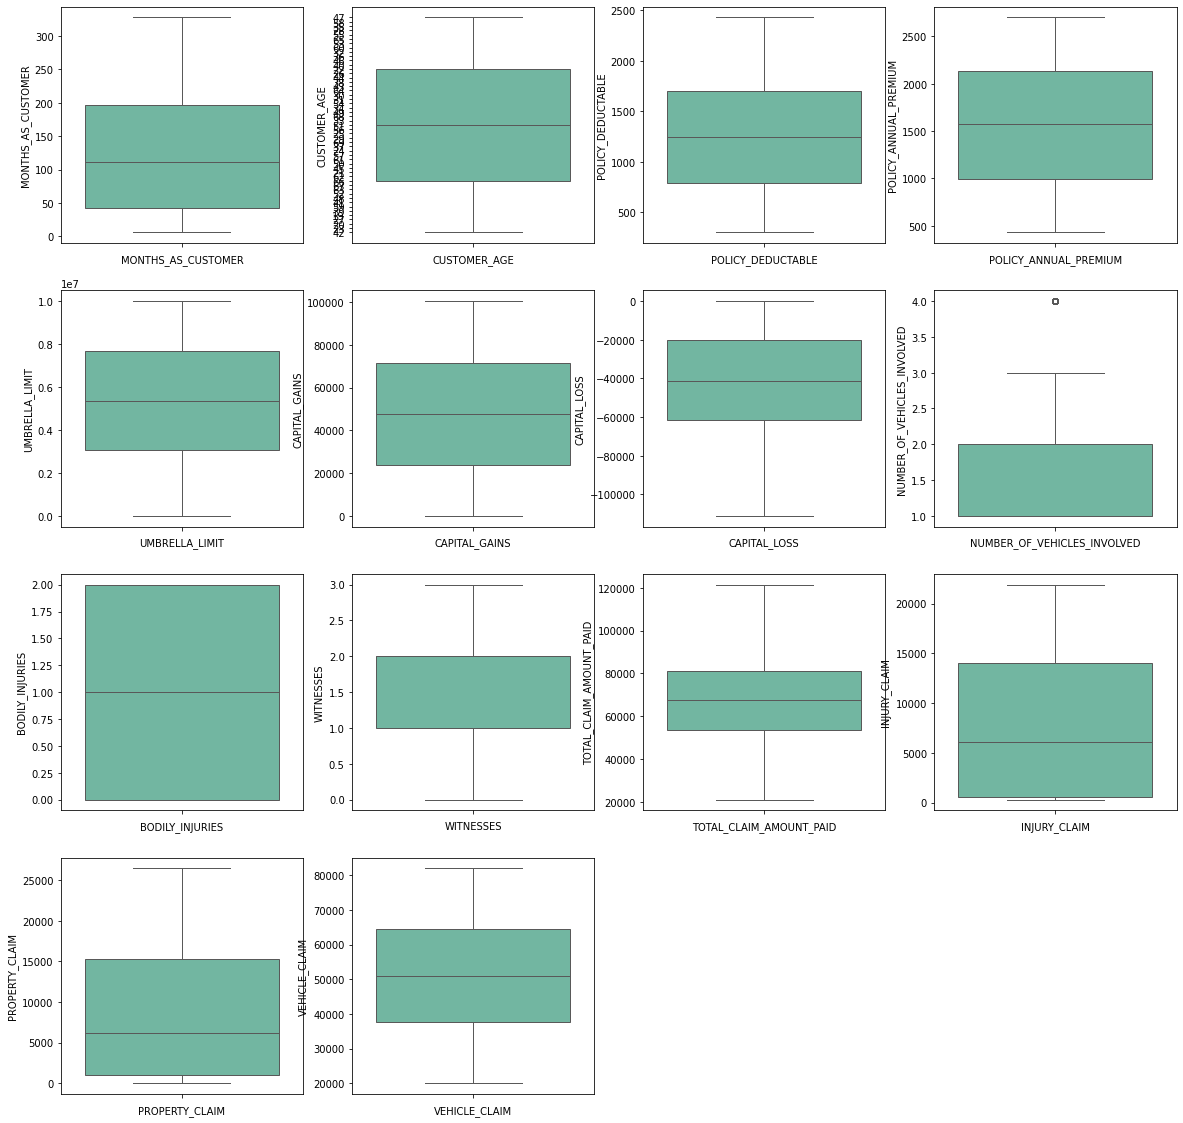

In [36]:
plt.figure(figsize=[20,20])


num_col= ['MONTHS_AS_CUSTOMER','CUSTOMER_AGE','POLICY_DEDUCTABLE','POLICY_ANNUAL_PREMIUM','UMBRELLA_LIMIT','CAPITAL_GAINS','CAPITAL_LOSS','NUMBER_OF_VEHICLES_INVOLVED','BODILY_INJURIES','WITNESSES',
 'TOTAL_CLAIM_AMOUNT_PAID','INJURY_CLAIM', 'PROPERTY_CLAIM', 'VEHICLE_CLAIM']

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(insurance_claim[i] , palette="Set2")
    c = c + 1
    
plt.show()


In [37]:
insurance_claim['POLICE_REPORT_AVAILABLE'].value_counts(normalize=True,dropna=False)

POLICE_REPORT_AVAILABLE
Property Damage          0.563571
No Property Damage       0.378383
Details not Available    0.058045
Name: proportion, dtype: float64